## Import Packages

In [2]:
#General data processing
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

#SKlearn Packages
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer

#Other Stats Packages
from scipy import stats
import statsmodels.api as sm

#XG Bosst and Scikit Optimize
import skopt
from xgboost import XGBRegressor

#Pickle
import pickle

## Data Preparation

### Read Data

In [3]:
boston_df = pd.read_csv("./data/boston_train.csv")
boston_holdout = pd.read_csv("./data/boston_holdout.csv")

### Null values

In [4]:
boston_df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9959 entries, 0 to 9958
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              9959 non-null   int64  
 1   zipcode          9959 non-null   int64  
 2   own_occ          9959 non-null   object 
 3   av_total         9959 non-null   int64  
 4   land_sf          9959 non-null   int64  
 5   yr_built         9959 non-null   int64  
 6   yr_remod         9612 non-null   float64
 7   living_area      9959 non-null   int64  
 8   num_floors       9959 non-null   float64
 9   structure_class  9959 non-null   object 
 10  r_bldg_styl      9959 non-null   object 
 11  r_roof_typ       9959 non-null   object 
 12  r_ext_fin        9959 non-null   object 
 13  r_total_rms      9959 non-null   int64  
 14  r_bdrms          9959 non-null   int64  
 15  r_full_bth       9959 non-null   int64  
 16  r_half_bth       9959 non-null   int64  
 17  r_bth_style   

/tmp/ipykernel_18829/3764846778.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  boston_df.info(null_counts = True)


### Brief description of data

In [5]:
boston_df.describe(include='all').T.sort_values('unique')

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
structure_class,9959,1,R,9959,NaN,NaN,NaN,NaN,NaN,NaN,NaN
own_occ,9959,2,Y,8785,NaN,NaN,NaN,NaN,NaN,NaN,NaN
r_int_fin,9959,2,N,9952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
r_ac,9959,3,N,8289,NaN,NaN,NaN,NaN,NaN,NaN,NaN
r_bth_style,9959,4,S,6563,NaN,NaN,NaN,NaN,NaN,NaN,NaN
r_kitch_style,9959,4,S,5900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
r_ext_cnd,9959,5,A,8112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
r_ovrall_cnd,9959,5,A,8243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
r_int_cnd,9959,5,A,7133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
r_view,9959,5,A,9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory analysis

#### Do owner-occupied homes have higher assessed values?

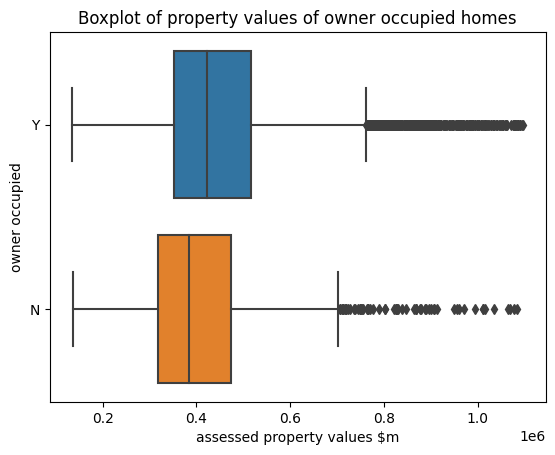

In [6]:
sns.boxplot( y=boston_df['own_occ'], x=boston_df["av_total"])\
.set(title = "Boxplot of property values of owner occupied homes",
    xlabel = "assessed property values $m",
    ylabel = "owner occupied")
plt.show()

#### Do houses built in 1990s have higher assessed values?

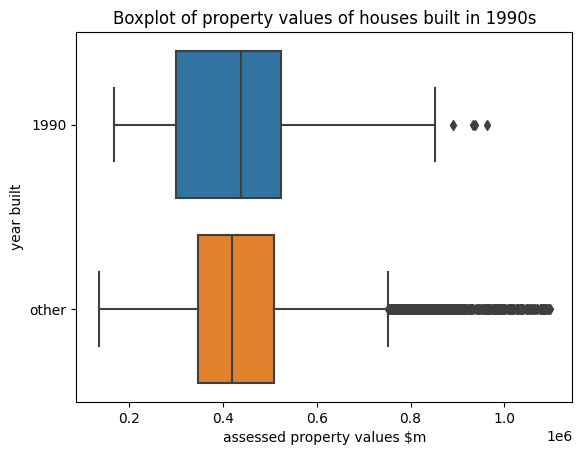

In [7]:
boston_df['1990s'] = boston_df.yr_built.apply(lambda x : '1990' if (x >=1990 and x <= 2000) else 'other')

sns.boxplot( y=boston_df['1990s'], x=boston_df["av_total"])\
.set(title = "Boxplot of property values of houses built in 1990s",
    xlabel = "assessed property values $m",
    ylabel = "year built")
plt.show()

#### Do houses remolded in recently (6 years from 2016 ) have higher assessed values?

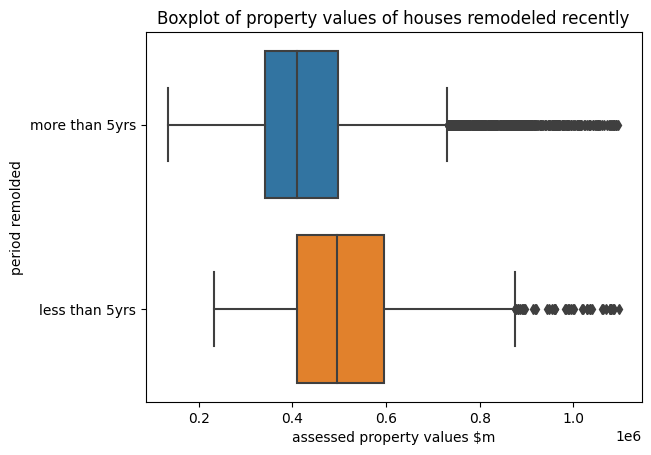

In [26]:
boston_df['recent_remodel'] = boston_df.yr_remod.apply(lambda x : 'less than 5yrs' if (x >=2010 and x <= 2016) else 'more than 5yrs')

sns.boxplot( y=boston_df['recent_remodel'], x=boston_df["av_total"])\
.set(title = "Boxplot of property values of houses remodeled recently",
    xlabel = "assessed property values $m",
    ylabel = "period remolded")
plt.show()

#### Correlation matrix

In [9]:
boston_df.select_dtypes(include=np.number)[numeric_features].corr()[['av_total']].sort_values('av_total',
                                                                                              ascending = False)

NameError: name 'numeric_features' is not defined

### New Feature Creations

In [10]:
# -- count nulls by column -- 
boston_df['yr_remod'] = np.where(boston_df['yr_remod'].isna(),2020,boston_df['yr_remod'])


boston_df['building_age'] = np.where(boston_df['yr_remod'] > boston_df['yr_built'], 
                                     2020 - boston_df['yr_remod'],
                                     2020 - boston_df['yr_built'] )


boston_holdout['yr_remod'] = np.where(boston_holdout['yr_remod'].isna(),2020,boston_holdout['yr_remod'])


boston_holdout['building_age'] = np.where(boston_holdout['yr_remod'] > boston_holdout['yr_built'], 
                                     2020 - boston_holdout['yr_remod'],
                                     2020 - boston_holdout['yr_built'] )



In [20]:
med_av_tot_city = boston_df.groupby(by='City_State')[['av_total']].aggregate(np.std).to_dict().get('av_total')
boston_df['med_av_tot_city'] = boston_df['City_State'].map(med_av_tot_city)
boston_holdout['med_av_tot_city'] = boston_df['City_State'].map(med_av_tot_city)

### Train - test split

In [15]:
train, test = train_test_split(boston_df,test_size=0.30)
print("train pct: {:2.2%}".format(train.shape[0]/boston_df.shape[0]))
print("test  pct: {:2.2%}".format(test.shape[0]/boston_df.shape[0]))

train pct: 70.00%
test  pct: 30.00%


### Pipelines

In [47]:
#categorical feature list
categorical_features= ['own_occ',
                       'structure_class',
                       'r_bldg_styl',
                       'r_roof_typ',
                       'r_ext_fin',
                       'r_bth_style',
                       'r_kitch_style',
                       'r_heat_typ',
                       'r_ac',
                       'r_ext_cnd',
                       'r_ovrall_cnd',
                       'r_int_cnd',
                      'City_State']
#numeric feature list
numeric_features= [
    'land_sf',
    'living_area',
    'num_floors',
    'r_total_rms',
    'r_bdrms',
    'r_full_bth',
    'r_half_bth',
    'r_kitch',
    'r_fplace',
    'Population',
    'Pop_Density',
    'Median_Income',
    'building_age']

#Target variagle
target = 'av_total'

#categorical pipeline
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot',  OneHotEncoder(handle_unknown='ignore')) #-- note this is from category-encoders not kslearn 
])

#numeric pipeline
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures())])

#Data processing pipeline

preprocessing = ColumnTransformer(transformers=[
    ('cat', categorical_pipe, categorical_features),
    ('num', numerical_pipe, numeric_features)
    ])


# Input dataframe and target dataframe
X = train[categorical_features + numeric_features]
y = train[target]

X_test = test[categorical_features + numeric_features]
y_test = test[target]

### Model evaluation function

In [44]:
# Evaluation metrics function

def eval_metrics(model,X,y_true):
    rmse = metrics.mean_squared_error(y_true = y_true,
                                      y_pred = model.predict(X),
                                      squared=False)
    r2 = metrics.r2_score(y_true= y_true,
                         y_pred = model.predict(X))
    mae = metrics.mean_absolute_error(y_true = y_true,
                                     y_pred = model.predict(X))
    return {"rmse":round(rmse, 4),
           "r2":round(r2,4),
           "mae":round(mae,2)}


### Model 1 - Linear regression

In [48]:
# Pipeline for model

lin_regressor = Pipeline([
    ('preprocess', preprocessing),
    ('regressor', LinearRegression())
])


#model fitting
lin_regressor = lin_regressor.fit(X, y)

### Model 1 - Evaluation

In [11]:
### Model 1 - Evaluation

In [49]:
print(f"Training : {eval_metrics(lin_regressor, X = X, y_true = y)}")
print(f"Testing : {eval_metrics(lin_regressor, X = X_test, y_true = y_test)}")

Training : {'rmse': 53619.3285, 'r2': 0.8692, 'mae': 38391.92}
Testing : {'rmse': 60090.7502, 'r2': 0.8319, 'mae': 40465.78}


### Model 2 - Random Forest

In [15]:
# Param Grid for Randomized search CV
random_grid = {'n_estimators': [1000,1500],
               'max_depth': [5,10,15],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4]}

# Randomized search cv
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(),
                                   param_distributions=random_grid,
                                   n_jobs = 3,
                                   scoring="neg_mean_squared_error",
                                   cv=5,
                                   random_state = 42, 
                                   verbose=1)

#Pipeline for Random Forest tuning

rf_pipe = Pipeline([
    ('preprocess', preprocessing),
    ('regressor', random_search)
])


rf = rf_pipe.fit(X, y)
rf

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['own_occ', 'structure_class',
                                                   'r_bldg_styl', 'r_roof_typ',
                                                   'r_ext_fin', 'r_bth_style',
                                                   'r_kitch_style',
                                                   'r_heat_typ', 'r_ac',
                                                   'r_ext_cnd', 'r_ovrall_cnd',...
                                                   'r_half_bth', 'r_kitch',
                                                   'r_fplace', 'Population',
                                                   'Pop_Density',
                                                   'Median_Income',
                                                   'building_age'])])),
                ('regressor',
                 RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                                    n_jobs=3,
                                    param_distributions={'max_depth': [5, 10,
                                                                       15],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              4],
                                                         'min_samples_split': [2,
                                                                               5,
                                                                               10],
                                                         'n_estimators': [1000,
                                                                          1500]},
                                    random_state=42,
                                    scoring='neg_mean_squared_error',
                                    verbose=1))])

In [16]:
# Refit model with best params
rf_pipe = Pipeline([
    ('preprocess', preprocessing),
    ('regressor', rf.named_steps.regressor.best_estimator_)
])

rf = rf_pipe.fit(X, y)
rf

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['own_occ', 'structure_class',
                                                   'r_bldg_styl', 'r_roof_typ',
                                                   'r_ext_fin', 'r_bth_style',
                                                   'r_kitch_style',
                                                   'r_heat_typ', 'r_ac',
                                                   'r_ext_cnd', 'r_ovrall_cnd',...
                                                   'r_view', 'City_State']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['land_sf', 'living_area',
                                                   'num_floors', 'r_total_rms',
                                                   'r_bdrms', 'r_full_bth',
                                                   'r_half_bth', 'r_kitch',
                                                   'r_fplace', 'Population',
                                                   'Pop_Density',
                                                   'Median_Income',
                                                   'building_age'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=15, min_samples_leaf=2,
                                       min_samples_split=5,
                                       n_estimators=1000))])

### Model 2 - Evaluation

In [17]:
print(f"Training : {eval_metrics(rf, X = X, y_true = y)}")
print(f"Testing : {eval_metrics(rf, X = X_test, y_true = y_test)}")

Training : {'rmse': 29551.7688, 'r2': 0.9597, 'mae': 21227.79}
Testing : {'rmse': 55750.4162, 'r2': 0.8601, 'mae': 39451.0}


### Moel 2 - Feature importance

In [54]:
#Function to plot model importance

def model_var_importance(model, model_name, feature_names):
    
    # -- get feature importance 
    importance = model.named_steps['regressor'].feature_importances_

    # -- summarize feature importance into a dictionary 
    feature_imp ={}
    for i,v in enumerate(importance):
        items = feature_names[i].split('_')
        if items[0].isdigit():
            fname = categorical_features[int(items[0])] + "_" + items[1]
            feature_imp[fname] = v
        else:
            feature_imp[feature_names[i]] = v
            #print(items[0].isdigit())
            #print(items)
        #if int(items[0]) >= 0:  
        #print(categorical_features[int(items[0])])

    # make the dictionary a data frame 
    feature_imp = pd.DataFrame.from_dict(feature_imp, orient='index',
                                         columns=['importance'])

    # -- prep and filter our dataframe, only need to look at the important features i.e. things > 0 
    feature_imp = (feature_imp
                   .reset_index()
                   .rename(columns={'index':'feature'})
                   .sort_values('importance',ascending=False)
                   .query('importance > 0.01'))

    # -- plot that 
    plt.figure(figsize=(10,10))
    sns.barplot(x="importance", y="feature", data=feature_imp, color="lightblue")
    plt.title( model_name + 'Variable Iportance')
    plt.ylabel('Feature')
    plt.xlabel('Importance ')
    plt.xticks(rotation=45)
    plt.show()

In [55]:
# -- gets the feature names 
categorical_pipe.fit_transform(X[categorical_features])
transformed_categorical = list(categorical_pipe['onehot'].get_feature_names_out(categorical_features))

# -- creates one list of all the feature names. 
feature_names =  transformed_categorical + numeric_features

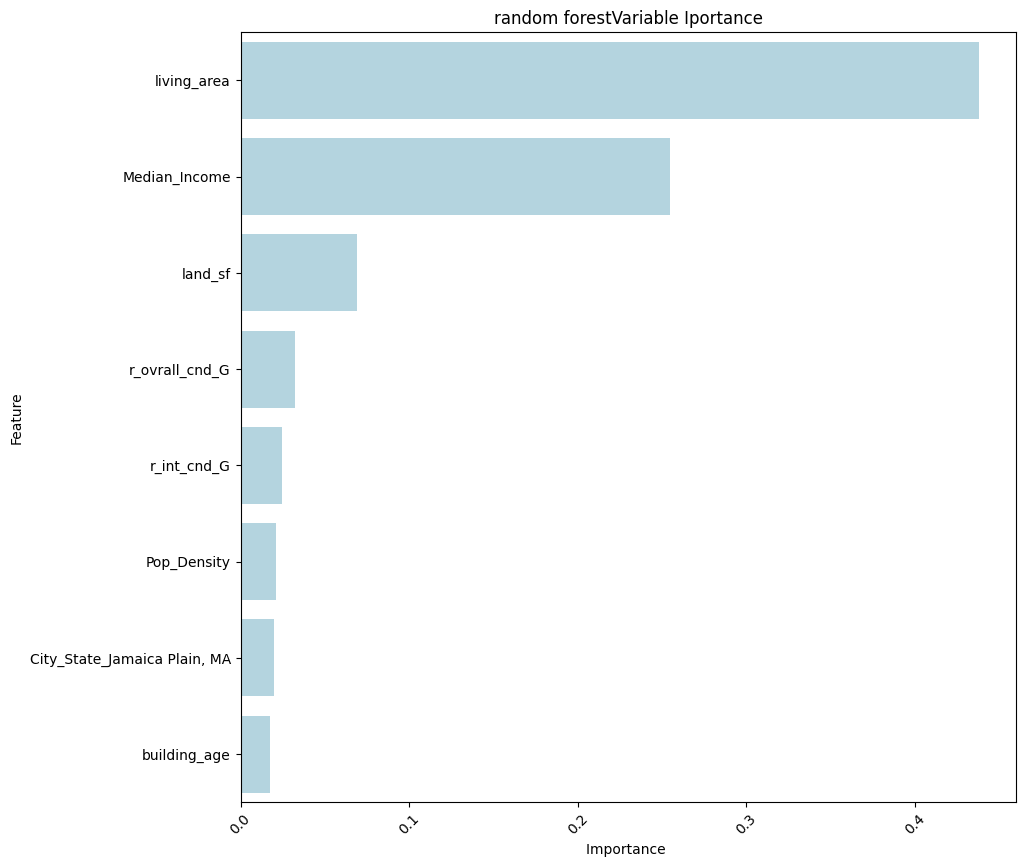

In [44]:
# -- Plot feature importance
model_var_importance(rf, 'random forest', feature_names)

In [46]:
#Save model to file
with open("./model/rf_tune.pickle", "wb") as f:
    pickle.dump(rf, f)

### Model 3 - XGboost

In [50]:
#param grid for randdomized search cv

params_xgbr = { 'max_depth': [2,3,4,5],
           'learning_rate': [0.005,0.075,0.01],
           'n_estimators': [500, 1000,1500,1800],
           'colsample_bytree': [0.1,0.2,0.3, 0.4]}


# randomized search cv instance
xgbr =  RandomizedSearchCV(estimator=XGBRegressor(seed = 20), 
                           param_distributions=params_xgbr,
                           scoring='neg_root_mean_squared_error',
                           verbose=1,
                           n_jobs = 3,
                           random_state = 42,
                          cv=5)

#pipeline for xgboost tune
xgbr_pipe = Pipeline([
    ('preprocess', preprocessing),
    ('regressor', xgbr)
])

#fit pipeline
xgb = xgbr_pipe.fit(X, y)
xgb.named_steps.regressor.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 1800,
 'max_depth': 5,
 'learning_rate': 0.01,
 'colsample_bytree': 0.3}

In [51]:
# Refit model with best params
xgb_pipe = Pipeline([
    ('preprocess', preprocessing),
    ('regressor', xgb.named_steps.regressor.best_estimator_)
])

xgb = xgb_pipe.fit(X, y)
xgb

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['own_occ', 'structure_class',
                                                   'r_bldg_styl', 'r_roof_typ',
                                                   'r_ext_fin', 'r_bth_style',
                                                   'r_kitch_style',
                                                   'r_heat_typ', 'r_ac',
                                                   'r_ext_cnd', 'r_ovrall_cnd',...
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='', learning_rate=0.01,
                              max_bin=256, max_cat_threshold=64,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=5, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=1800, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=20, ...))])

### Model 3 - Evaluation

In [52]:
print(f"Training : {eval_metrics(xgb, X = X, y_true = y)}")
print(f"Testing : {eval_metrics(xgb, X = X_test, y_true = y_test)}")

Training : {'rmse': 35240.0056, 'r2': 0.9435, 'mae': 26383.04}
Testing : {'rmse': 50171.2449, 'r2': 0.8828, 'mae': 36312.63}


### Model 3 - Feature importance

In [57]:
model_var_importance(xgb, 'random forest', feature_names)

IndexError: list index out of range

### Top 10 predictions 

In [115]:
test['y_pred'] = xgb.predict(test)

test['error'] = np.abs(test['av_total'] - test['y_pred'])

#### Numerical features

In [123]:
test.nsmallest(10,'error')[numeric_features + ['error']].describe()

,land_sf,living_area,num_floors,r_total_rms,r_bdrms,r_full_bth,r_half_bth,r_kitch,r_fplace,Population,Pop_Density,Median_Income,building_age,av_total,error
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000
mean,5826.400000,1508.900000,1.550000,6.300000,3.100000,1.200000,0.400000,1.0,0.500000,35440.10000,12283.300000,73818.80000,56.300000,433260.000000,97.725000
std,1560.632365,253.755109,0.437798,0.823273,0.567646,0.421637,0.516398,0.0,0.707107,2459.51289,2289.740211,5246.20491,33.209938,112640.551214,68.039958
min,4000.000000,1152.000000,1.000000,5.000000,2.000000,1.000000,0.000000,1.0,0.000000,28488.00000,6207.000000,58890.00000,8.000000,354600.000000,16.281250
25%,4768.250000,1306.000000,1.125000,6.000000,3.000000,1.000000,0.000000,1.0,0.000000,36314.00000,13251.000000,75446.00000,27.000000,375050.000000,34.476562
50%,5557.500000,1501.000000,1.500000,6.000000,3.000000,1.000000,0.000000,1.0,0.000000,36314.00000,13251.000000,75446.00000,65.000000,395200.000000,98.890625
75%,6287.250000,1714.500000,2.000000,6.750000,3.000000,1.000000,1.000000,1.0,1.000000,36314.00000,13251.000000,75446.00000,82.000000,423900.000000,146.945312
max,8775.000000,1919.000000,2.000000,8.000000,4.000000,2.000000,1.000000,1.0,2.000000,36314.00000,13251.000000,75730.00000,95.000000,735400.000000,202.250000


#### Categorical features

In [118]:
test.nsmallest(10,'error')[categorical_features].describe()

,own_occ,structure_class,r_bldg_styl,r_roof_typ,r_ext_fin,r_bth_style,r_kitch_style,r_heat_typ,r_ac,r_ext_cnd,r_ovrall_cnd,r_int_cnd,r_int_fin,r_view,City_State
count,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
unique,2,1,5,2,2,2,2,2,1,1,2,2,1,2,3
top,Y,R,CL,G,M,S,S,W,N,A,A,A,N,A,"Cambridge, MA"
freq,9,10,4,8,6,8,8,8,10,10,8,9,10,9,8


### Bottom 10 predictions

#### Numerical features

In [125]:
test.nlargest(10,'error')[numeric_features + ['error']].describe()

,land_sf,living_area,num_floors,r_total_rms,r_bdrms,r_full_bth,r_half_bth,r_kitch,r_fplace,Population,Pop_Density,Median_Income,building_age,av_total,error
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,10.000000
mean,9742.700000,3457.100000,2.200000,9.900000,4.100000,2.000000,0.900000,1.100000,0.900000,37186.100000,11235.900000,68668.200000,29.000000,8.608900e+05,263827.262500
std,12838.878101,2040.624874,0.349603,3.784471,1.595131,0.816497,0.567646,0.316228,1.100505,5986.573838,2822.783632,11694.880407,28.840558,2.378782e+05,39346.267255
min,2074.000000,2124.000000,2.000000,6.000000,2.000000,1.000000,0.000000,1.000000,0.000000,28488.000000,6207.000000,48841.000000,6.000000,3.370000e+05,231036.812500
25%,4096.250000,2331.250000,2.000000,7.250000,3.000000,2.000000,1.000000,1.000000,0.000000,35401.000000,10618.000000,63100.000000,12.750000,7.206750e+05,239953.156250
50%,5277.000000,2580.000000,2.000000,8.500000,3.500000,2.000000,1.000000,1.000000,0.500000,35401.000000,10618.000000,75730.000000,22.000000,9.706500e+05,255551.375000
75%,9000.000000,3415.000000,2.375000,10.750000,5.000000,2.000000,1.000000,1.000000,1.750000,35401.000000,10618.000000,75730.000000,29.750000,1.016100e+06,266736.109375
max,45522.000000,8623.000000,3.000000,17.000000,7.000000,4.000000,2.000000,2.000000,3.000000,47783.000000,15913.000000,75730.000000,105.000000,1.060100e+06,366694.375000


#### Categorical features

In [121]:
test.nlargest(10,'error')[categorical_features].describe()

,own_occ,structure_class,r_bldg_styl,r_roof_typ,r_ext_fin,r_bth_style,r_kitch_style,r_heat_typ,r_ac,r_ext_cnd,r_ovrall_cnd,r_int_cnd,r_int_fin,r_view,City_State
count,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
unique,1,1,2,3,5,2,2,2,2,2,2,2,2,1,3
top,Y,R,CL,G,F,S,S,W,N,A,A,G,N,A,"Jamaica Plain, MA"
freq,10,10,9,6,4,5,5,7,7,6,7,6,9,10,7


### Kaggle

In [58]:
#predict av_total
pred_hold = xgb.predict(boston_holdout)

#create column av_total
boston_holdout['av_total'] = pred_hold

#write out csv for kaggle
boston_holdout[['pid','av_total']].to_csv('./results/boston_kaggle_poly.csv',index = False)